# Porgram-15 : Show the calculation and demonstration of KNN (3,4,5 NN) using sklearn

In [6]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [7]:
mnist = fetch_openml('mnist_784',version=1)
X,y = mnist['data'],mnist['target'].astype(int)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#print(X_scaled)
Xtrain, Xtest, ytrain, ytest = train_test_split(X_scaled, y, test_size= 0.2, random_state = 42)
clf = KNeighborsClassifier(n_neighbors = 5)
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)
print('Accuracy:',np.round(metrics.accuracy_score(ytest,ypred),4))
print('Precision:',np.round(metrics.precision_score(ytest,ypred,average = 'weighted'),4))
print('Recall:', np.round(metrics.recall_score(ytest,ypred,average ='weighted'),4))
print('F1 Score:',np.round(metrics.f1_score(ytest,ypred,average='weighted'),4))
print('Cohen Kappa Score:',np.round(metrics.cohen_kappa_score(ytest,ypred),4))
print('Matthews Corrcoef:', np.round(metrics.matthews_corrcoef(ytest,ypred),4))

Accuracy: 0.9449
Precision: 0.9451
Recall: 0.9449
F1 Score: 0.9448
Cohen Kappa Score: 0.9388
Matthews Corrcoef: 0.9388


In [17]:

from sklearn.datasets import load_iris

Test Accuracy: 0.7555555555555555


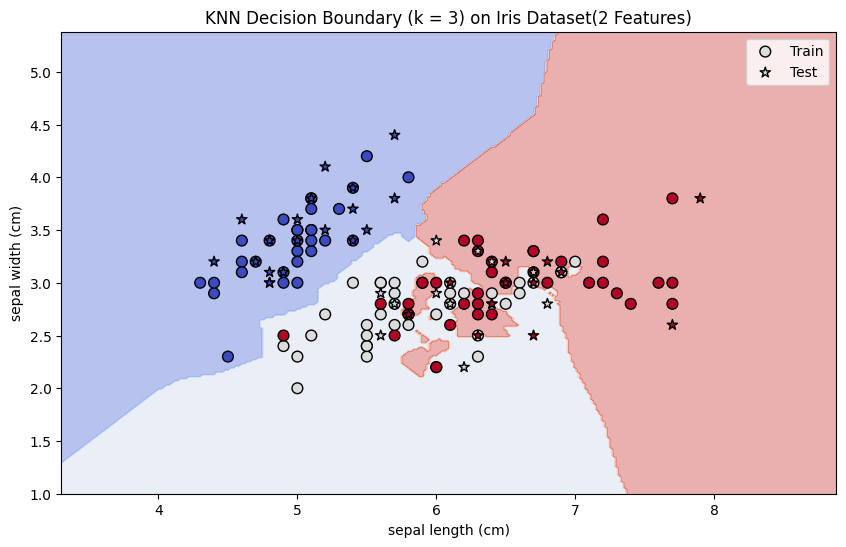

In [18]:


# Load Iris dataset
iris = load_iris()
X = iris.data[:, :2]   #  Use only first two features for visualization
y = iris.target

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train KNN classifier
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Accuracy
print("Test Accuracy:", knn.score(X_test, y_test))

# Create mesh grid for plotting
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict over mesh grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolor='k', s=60, label="Train")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm, edgecolor='k', s=60, marker='*', label="Test")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title(f"KNN Decision Boundary (k = {k}) on Iris Dataset(2 Features)")
plt.legend()
plt.show()


KNN Accuracy: 1.0


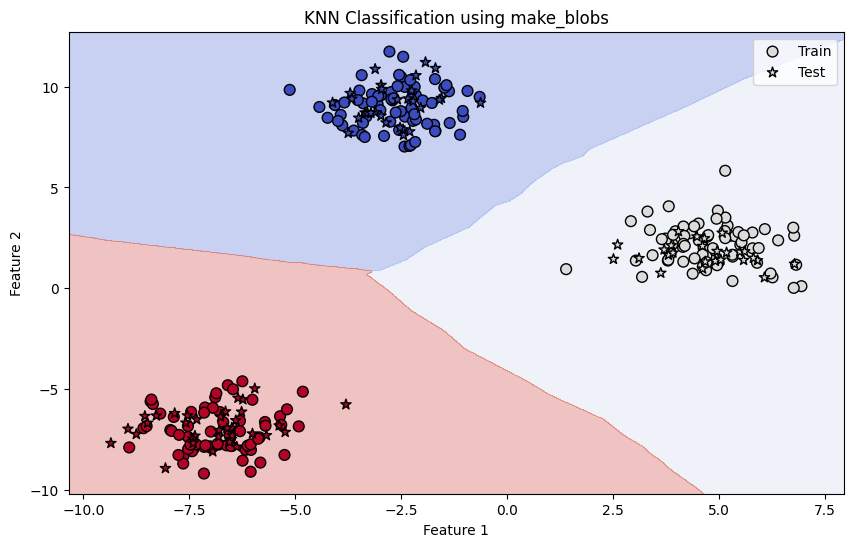

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_sp
X, y = make_blobs(n_samples=300, centers=3, random_state=42, cluster_std=1.0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

# Accuracy
print("KNN Accuracy:", knn.score(X_test, y_test))

# Create mesh grid for visualization
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict on mesh grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolor='k', s=60, label='Train')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm, edgecolor='k', s=60, marker='*', label='Test')
plt.title("KNN Classification using make_blobs")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()
